In [ ]:
# Demo 4: Parametric Methods

In [1]:
import math as mt
import numpy as np
import pandas as pd
import seaborn as sns
import statistics as st
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn import datasets
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.datasets import load_wine
from sklearn.metrics import accuracy_score

In [2]:
def loadDataset():
  dataset = datasets.load_wine()
  features = dataset.data
  labels = dataset.target
  return dataset, features[:,:2], labels

In [7]:
wine_data = load_wine()
X = wine_data.data
y = wine_data.target

X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

Accuracy: 0.8055555555555556


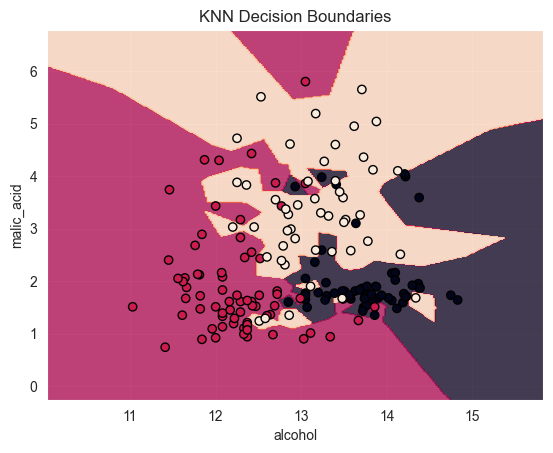

In [8]:
# Step 1: Load the Wine dataset
wine_data = load_wine()
X = wine_data.data
y = wine_data.target

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create and train the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=1) #EXPERIMENT TUNING n=1, 2, 3, 4, 5 etc.
knn_classifier.fit(X_train[:, :2], y_train)  # Use only the first two features for training

# Step 4: Make predictions on the test set
y_pred = knn_classifier.predict(X_test[:, :2])  # Use only the first two features for prediction

# Step 5: Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Step 6: Plot the decision boundaries
# Choose two features for visualization (e.g., the first two features)
feature1_index = 0
feature2_index = 1

# Extract the chosen features from the dataset
feature1_values = X[:, feature1_index]
feature2_values = X[:, feature2_index]

# Create a grid of points for visualization
x1_min, x1_max = feature1_values.min() - 1, feature1_values.max() + 1
x2_min, x2_max = feature2_values.min() - 1, feature2_values.max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))
meshgrid_points = np.c_[xx1.ravel(), xx2.ravel()]

# Make predictions on the grid points
Z = knn_classifier.predict(meshgrid_points)
Z = Z.reshape(xx1.shape)

# Plot the decision boundaries
plt.figure()
plt.contourf(xx1, xx2, Z, alpha=0.8)
plt.scatter(feature1_values, feature2_values, c=y, edgecolors='k')
plt.xlabel(wine_data.feature_names[feature1_index])
plt.ylabel(wine_data.feature_names[feature2_index])
plt.title('KNN Decision Boundaries')
plt.show()


In [ ]:
#def loadDataset():
  #dataset = datasets.load_wine()
  #features = dataset.data
  #labels = dataset.target
  #return dataset, features[:,:2], labels

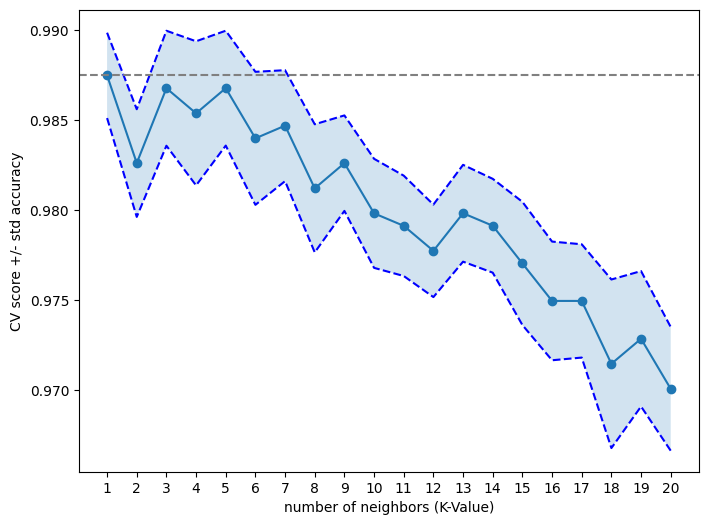

Test set score: 0.97
Final result of the model 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.97      0.97      0.97        35
           2       1.00      0.97      0.99        36
           3       0.91      1.00      0.95        29
           4       1.00      0.97      0.98        30
           5       0.95      0.97      0.96        40
           6       1.00      1.00      1.00        44
           7       0.95      1.00      0.97        39
           8       1.00      0.90      0.95        39
           9       0.98      0.98      0.98        41

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.97      0.97       360



In [ ]:
# KNN with 10-fold cross validation for metric = "euclidean"
X, y = datasets.load_digits(return_X_y=True)
X = X / X.max()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)

n_neighbors = np.linspace(1, 20, 20, dtype=np.int32)
tuned_parameters = [{"n_neighbors": n_neighbors}]
knn = KNeighborsClassifier(n_neighbors=1, metric = "euclidean")  ###
n_folds = 10 # n_folds = 10
clf = GridSearchCV(knn, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X_train, y_train)
scores = clf.cv_results_["mean_test_score"]
scores_std = clf.cv_results_["std_test_score"]

plt.figure().set_size_inches(8, 6)
plt.plot(n_neighbors, scores, marker="o")
std_error = scores_std / np.sqrt(n_folds)
plt.plot(n_neighbors, scores + std_error, "b--")
plt.plot(n_neighbors, scores - std_error, "b--")

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(n_neighbors, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel("CV score +/- std accuracy")
plt.xlabel("number of neighbors (K-Value)")
plt.axhline(np.max(scores), linestyle="--", color=".5")
plt.xticks(n_neighbors)
plt.show()

cli = KNeighborsClassifier(n_neighbors=5)  ###
cli.fit(X_train, y_train)
y_pred = cli.predict(X_test)
print("Test set score: {:.2f}".format(cli.score(X_test, y_test)))
print("Final result of the model \n {}".format(classification_report(y_test, y_pred)))

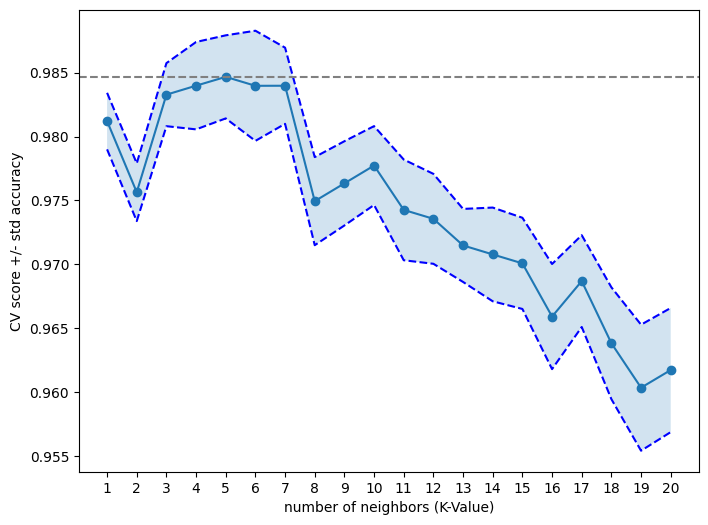

Test set score: 0.97
Final result of the model 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.97      0.97      0.97        35
           2       1.00      0.97      0.99        36
           3       0.91      1.00      0.95        29
           4       1.00      0.97      0.98        30
           5       0.95      0.97      0.96        40
           6       1.00      1.00      1.00        44
           7       0.95      1.00      0.97        39
           8       1.00      0.90      0.95        39
           9       0.98      0.98      0.98        41

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.97      0.97       360



In [ ]:
# KNN with 10-fold cross validation for metric = "manhattan"
X, y = datasets.load_digits(return_X_y=True)
X = X / X.max()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)

n_neighbors = np.linspace(1, 20, 20, dtype=np.int32)
tuned_parameters = [{"n_neighbors": n_neighbors}]
knn = KNeighborsClassifier(n_neighbors=1, metric = "manhattan")  ###
n_folds = 10
clf = GridSearchCV(knn, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X_train, y_train)
scores = clf.cv_results_["mean_test_score"]
scores_std = clf.cv_results_["std_test_score"]

plt.figure().set_size_inches(8, 6)
plt.plot(n_neighbors, scores, marker="o")
std_error = scores_std / np.sqrt(n_folds)
plt.plot(n_neighbors, scores + std_error, "b--")
plt.plot(n_neighbors, scores - std_error, "b--")

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(n_neighbors, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel("CV score +/- std accuracy")
plt.xlabel("number of neighbors (K-Value)")
plt.axhline(np.max(scores), linestyle="--", color=".5")
plt.xticks(n_neighbors)
plt.show()

cli = KNeighborsClassifier(n_neighbors=5)  ###
cli.fit(X_train, y_train)
y_pred = cli.predict(X_test)
print("Test set score: {:.2f}".format(cli.score(X_test, y_test)))
print("Final result of the model \n {}".format(classification_report(y_test, y_pred)))

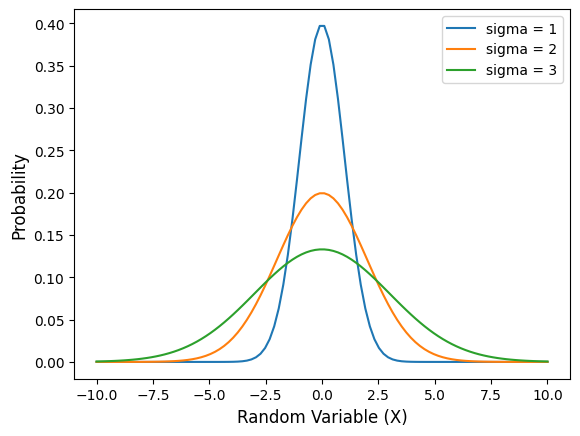

In [ ]:
# PDF same mean
# mu = Mean
# Sigma = Standart Deviation
mu_1, mu_2, mu_3 = 0, 0, 0
sigma_1, sigma_2, sigma_3 = 1, 2, 3

x = np.linspace(-10, 10, 100)

fd1 = norm.pdf(x, mu_1, sigma_1)
fd2 = norm.pdf(x, mu_2, sigma_2)
fd3 = norm.pdf(x, mu_3, sigma_3)

plt.plot(x, fd1, label= 'sigma = 1')
plt.plot(x, fd2, label= 'sigma = 2')
plt.plot(x, fd3, label= 'sigma = 3')
plt.xlabel('Random Variable (X)', fontsize='12')
plt.ylabel('Probability', fontsize='12')
plt.legend()
plt.show()

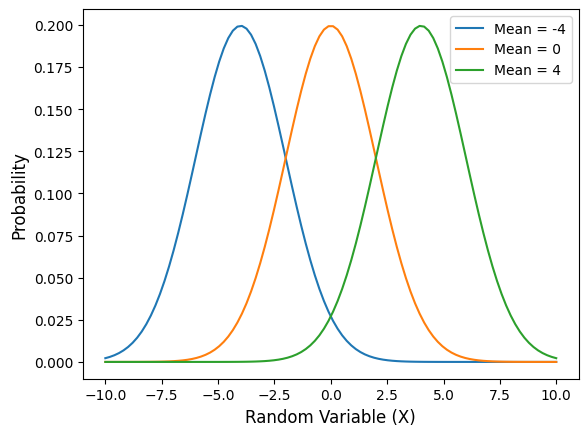

In [ ]:
# PDF same variance
mu_1, mu_2, mu_3 = -4, 0, 4
sigma_1, sigma_2, sigma_3 = 2, 2, 2

x = np.linspace(-10, 10, 100)

fd1 = norm.pdf(x, mu_1, sigma_1)
fd2 = norm.pdf(x, mu_2, sigma_2)
fd3 = norm.pdf(x, mu_3, sigma_3)

plt.plot(x, fd1, label='Mean = -4')
plt.plot(x, fd2, label='Mean = 0')
plt.plot(x, fd3, label='Mean = 4')
plt.xlabel('Random Variable (X)', fontsize='12')
plt.ylabel('Probability', fontsize='12')
plt.legend()
plt.show()

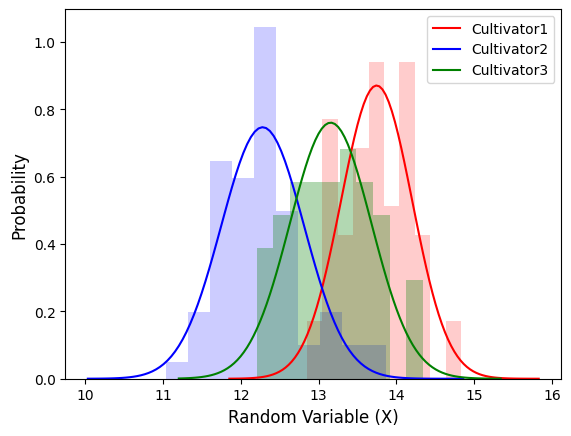

In [ ]:
# PDF of Wine Dataset
wine, features, labels = loadDataset()

feat1 = features[labels==0,0]
feat2 = features[labels==1,0]
feat3 = features[labels==2,0]

mean1, sdt1  = norm.fit(feat1)
mean2, sdt2 =  norm.fit(feat2)
mean3, sdt3 =  norm.fit(feat3)

x1 = np.linspace(feat1.min() -1, feat1.max() + 1, 100)
x2 = np.linspace(feat2.min() -1, feat2.max() + 1, 100)
x3 = np.linspace(feat3.min() -1, feat3.max() + 1, 100)

fitted_data1 = norm.pdf(x1, mean1, sdt1)
fitted_data2 = norm.pdf(x2, mean2, sdt2)
fitted_data3 = norm.pdf(x3, mean3, sdt3)

plt.plot(x1,fitted_data1,'r-', label='Cultivator1')
plt.hist(feat1, density=True, color="red", alpha=0.2)

plt.plot(x2,fitted_data2,'b-', label='Cultivator2')
plt.hist(feat2, density=True, color="blue", alpha=0.2)

plt.plot(x3,fitted_data3,'g-', label='Cultivator3')
plt.hist(feat3, density=True, color="green", alpha=0.3)

plt.legend()
plt.xlabel('Random Variable (X)', fontsize='12')
plt.ylabel('Probability', fontsize='12')
plt.show()

The second code builds upon the first code by manually calculating the probability density function (PDF) of each wine cultivator class using the Gaussian (Normal) distribution formula, whereas the first code uses the scipy.stats.norm.pdf function to achieve the same.

Here’s a breakdown of the additional functionality introduced by the second code:

1. Variance Calculation:
In the second code, the variance (var1, var2, var3) is computed as the square of the standard deviation (sdt1, sdt2, sdt3), using var = std^2. This is equivalent to np.var(feat1) but is manually computed from the standard deviation obtained in the first code.
The first code doesn't compute or use variance explicitly.
2. Manual PDF Calculation:
The second code manually calculates the PDF for each value in feat1, feat2, and feat3 using the Gaussian distribution formula:



```
PDF(x) = (1 / (sqrt(2 * pi) * variance)) * exp((-1 * (x - mean)^2) / (2 * variance^2))
```



This is done using a loop over each feature and applying the formula, instead of using scipy.stats.norm.pdf as in the first code.
Lists li_cul1, li_cul2, and li_cul3 store the manually computed PDF values for each corresponding class.
3. Sorting of Features:
Before calculating the PDF values in the second code, the feature arrays feat1, feat2, and feat3 are sorted. Sorting is not done in the first code.
4. Plotting:
The second code closes any previously opened figures (plt.close('all')) before plotting.
Instead of plotting the fitted data over a linspace grid (x1, x2, x3) as done in the first code, it directly plots the sorted feature values (feat1, feat2, feat3) against their corresponding manually calculated PDF values (li_cul1, li_cul2, li_cul3).

5. Printed Output:
The second code also prints the mean and variance values for each class:

css code
```
Mean1: {mean1}, Var1: {var1}
Mean2: {mean2}, Var2: {var2}
Mean3: {mean3}, Var3: {var3}
```






This provides additional information about the spread (variance) of each class.

#In Summary:
First Code: Uses built-in functions from scipy to fit and plot Gaussian PDFs for each class of the wine dataset, handling the calculation of PDF values automatically.

Second Code: Manually calculates the PDF for each feature in the wine dataset using the Gaussian formula and plots the results, adding more control and transparency over the process (e.g., variance calculation and the plotting of sorted features).
The second code essentially replicates the functionality of the first code but does so manually and with extra information (like variance and sorted features).

Mean1: 13.744745762711865, Var1: 0.20994018960068953
Mean2: 12.278732394366195, Var2: 0.28532937909145006
Mean3: 13.153750000000002, Var3: 0.2752984375000001


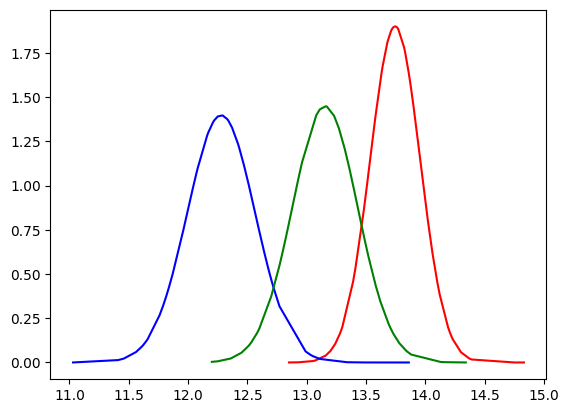

In [ ]:
var1= sdt1**2 #np.var(feat1)
var2= sdt2**2 #np.var(feat2)
var3= sdt3**2 #np.var(feat3)

li_cul1 = []
feat1.sort()
for i in feat1:
  num = (1/(mt.sqrt(2*mt.pi)*var1))
  num2 = -1 * pow((i - mean1),2)
  den2 = 2*pow(var1,2)
  point = num * mt.exp(num2/den2)
  li_cul1.append(point)

li_cul2 = []
feat2.sort()
for j in feat2:
  num = (1/(mt.sqrt(2*mt.pi)*var2))
  num2 = -1 * pow((j - mean2),2)
  den2 = 2*pow(var2,2)
  point = num * mt.exp(num2/den2)
  li_cul2.append(point)

li_cul3 = []
feat3.sort()
for k in feat3:
  num = (1/(mt.sqrt(2*mt.pi)*var3))
  num2 = -1 * pow((k - mean3),2)
  den2 = 2*pow(var3,2)
  point = num * mt.exp(num2/den2)
  li_cul3.append(point)

print(f"Mean1: {mean1}, Var1: {var1}")
print(f"Mean2: {mean2}, Var2: {var2}")
print(f"Mean3: {mean3}, Var3: {var3}")

plt.close('all')
plt.plot(feat1, li_cul1,'r-', label='Cultivator1')
plt.plot(feat2, li_cul2,'b-', label='Cultivator2')
plt.plot(feat3, li_cul3,'g-', label='Cultivator3')

In [ ]:
# Maximum Likelihood Estimation for 100 points
# Random Variable
x = np.linspace(-20, 20, 100)

# Normally distributed residuals
e = np.random.normal(3, 5, 100)

# generate ground truth
y = 4*x + e

df = pd.DataFrame({'constant':1, 'x':x, 'y':y})
df.head()

,constant,x,y
0,1,-20.000000,-83.719420
1,1,-19.595960,-78.262906
2,1,-19.191919,-74.518338
3,1,-18.787879,-77.270641
4,1,-18.383838,-68.081844


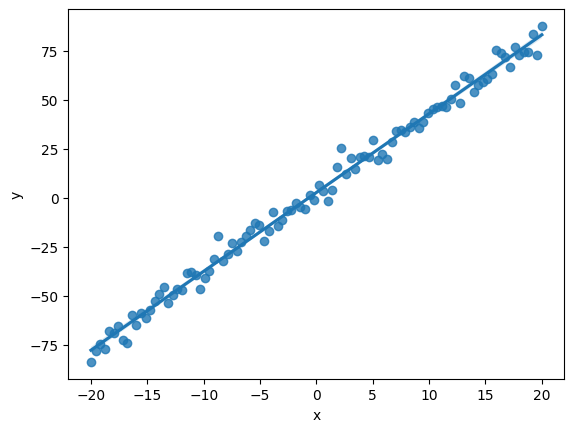

In [ ]:
sns.regplot(x='x', y='y', data = df)
plt.show()

In [ ]:
# Linear Regression Solution before MLE
# score, coef, intercept

X = df[['constant', 'x']]

reg = LinearRegression().fit(X, y)
print("score:", reg.score(X, y))
print("coef:", reg.coef_)
print("intercept:", reg.intercept_)

score: 0.9915818445137333
coef: [0.         4.02480006]
intercept: 2.7661207916699553


In [ ]:
# MLE
def MLE_est(param):
  intercept, coef, std_dev = param
  # prediction
  yhat = coef * x + intercept
  # log-likelihood
  LL = np.sum(norm.logpdf(y, yhat, std_dev))
  # negative log-likelihood
  neg_LL = -1 * LL
  return neg_LL

In [ ]:
# minimize arguments: function, intial_guess_of_parameters, method
# Broyden–Fletcher–Goldfarb–Shanno algorithm (BFGS)
# Limited-memory BFGS (L-BFGS or LM-BFGS) is an optimization algorithm
# The L-BFGS-B algorithm extends L-BFGS to handle simple box constraints (aka bound constraints) on variables;
MLE_model = minimize(MLE_est, np.array([3,3,3]), method='L-BFGS-B')
MLE_model

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 288.3384854815477
        x: [ 2.766e+00  4.025e+00  4.325e+00]
      nit: 14
      jac: [-5.684e-06 -9.095e-05  2.274e-05]
     nfev: 60
     njev: 15
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>

In [ ]:
def load_dataset():
    # Load the dataset
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"
    names = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']
    dataset = pd.read_csv(url, names=names)

    # Split the dataset into features and labels
    X = dataset.iloc[:, :-1]
    y = dataset.iloc[:, -1]

    # Get the list of class names
    class_names = list(dataset['Type'].unique())

    return X, y, class_names

In [ ]:
def remove_classes(X, y, class_names, classes_to_remove):
    # Find the indices of the classes to remove
    indices_to_remove = [i for i, class_name in enumerate(class_names) if class_name in classes_to_remove]

    # Remove the rows corresponding to the classes to remove
    mask = ~y.isin(classes_to_remove)
    X_filtered = X.loc[mask]
    y_filtered = y.loc[mask]

    # Remove the names of the classes to remove from the class_names list
    class_names_filtered = [class_name for class_name in class_names if class_name not in classes_to_remove]

    return X_filtered, y_filtered, class_names_filtered

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

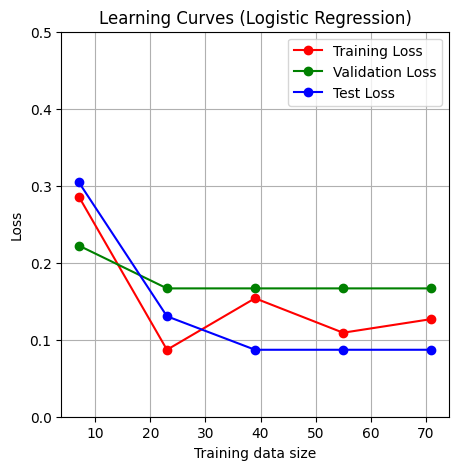

In [ ]:
# block with insufficient iteration limit of default max_iter=100 (need to be 1000, which is shown in the next block)
#line: estimator = LogisticRegression() by default gives max_iter=100
#here it is left intact (with suggestion to change it to estimator = LogisticRegression(max_iter=1000))
#the fix is applied in the next block for comparizon.
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
import numpy as np

def plot_learning_curve(estimator, title, X_train, y_train, X_test, y_test, axes=None, ylim=None, train_sizes=np.linspace(0.1, 1.0, 5),):
    axes = plt.figure(figsize=(5, 5)).gca()
    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training data size")
    axes.set_ylabel("Loss")
    cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
    train_loss_list = []
    val_loss_list = []
    test_loss_list = []
    length_list = []
    X_t, X_val, y_t, y_val = train_test_split(X_train, y_train, test_size = 0.20, random_state=0)

    for i in [0.1, 0.325, 0.55, 0.775, 1]:
      length = int(X_t.shape[0] * i )
      length_list.append(length)
      X_tmp = X_t[:length]
      y_tmp = y_t[:length]
      estimator.fit(X_tmp, y_tmp)
      train_loss = 1 - estimator.score(X_tmp, y_tmp)
      train_loss_list.append(train_loss)
      val_loss = 1 - estimator.score(X_val, y_val)
      val_loss_list.append(val_loss)
      test_loss = 1 - estimator.score(X_test, y_test)
      test_loss_list.append(test_loss)

    # Plot learning curve
    axes.grid()
    axes.plot(
        length_list, train_loss_list, "o-", color="r", label="Training Loss"
    )
    axes.plot(
        length_list, val_loss_list, "o-", color="g", label="Validation Loss"
    )
    axes.plot(
        length_list, test_loss_list, "o-", color="b", label="Test Loss"
    )
    axes.legend(loc="best")

    return plt

title = "Learning Curves (Logistic Regression)"
##### load dataset
X, y, class_names = load_dataset()
X, y, class_names = remove_classes(X, y, class_names, classes_to_remove=[class_names[2],class_names[4],class_names[1]])
X = X.iloc[:, 4:6]
##### splitting the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)
##### define the model
estimator = LogisticRegression()  #SUGGESTED FIX: #estimator = LogisticRegression(max_iter=1000)
##### plot the curve
plot_learning_curve(estimator, title, X_train, y_train, X_test, y_test,  ylim=(0.0, 0.5),)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

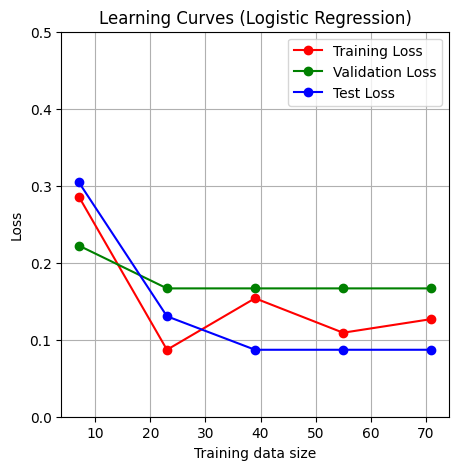

In [ ]:
#the fix is applied of changing line "estimator = LogisticRegression()" to "estimator = LogisticRegression(max_iter=1000)"
#the fix removes the message from compiler, however, there is no significant change in the output,
#which shows that suboptimal number of iterations in this case performs as good as optimised one.
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
import numpy as np

def plot_learning_curve(estimator, title, X_train, y_train, X_test, y_test, axes=None, ylim=None, train_sizes=np.linspace(0.1, 1.0, 5),):
    axes = plt.figure(figsize=(5, 5)).gca()
    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training data size")
    axes.set_ylabel("Loss")
    cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
    train_loss_list = []
    val_loss_list = []
    test_loss_list = []
    length_list = []
    X_t, X_val, y_t, y_val = train_test_split(X_train, y_train, test_size = 0.20, random_state=0)

    for i in [0.1, 0.325, 0.55, 0.775, 1]:
      length = int(X_t.shape[0] * i )
      length_list.append(length)
      X_tmp = X_t[:length]
      y_tmp = y_t[:length]
      estimator.fit(X_tmp, y_tmp)
      train_loss = 1 - estimator.score(X_tmp, y_tmp)
      train_loss_list.append(train_loss)
      val_loss = 1 - estimator.score(X_val, y_val)
      val_loss_list.append(val_loss)
      test_loss = 1 - estimator.score(X_test, y_test)
      test_loss_list.append(test_loss)

    # Plot learning curve
    axes.grid()
    axes.plot(
        length_list, train_loss_list, "o-", color="r", label="Training Loss"
    )
    axes.plot(
        length_list, val_loss_list, "o-", color="g", label="Validation Loss"
    )
    axes.plot(
        length_list, test_loss_list, "o-", color="b", label="Test Loss"
    )
    axes.legend(loc="best")

    return plt

title = "Learning Curves (Logistic Regression)"
##### load dataset
X, y, class_names = load_dataset()
X, y, class_names = remove_classes(X, y, class_names, classes_to_remove=[class_names[2],class_names[4],class_names[1]])
X = X.iloc[:, 4:6]
##### splitting the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)
##### define the model
estimator = LogisticRegression(max_iter=1000)  #estimator = LogisticRegression()  #estimator = LogisticRegression(max_iter=1000)
##### plot the curve
plot_learning_curve(estimator, title, X_train, y_train, X_test, y_test,  ylim=(0.0, 0.5),)

(7, 2)
(7,)
(23, 2)
(23,)
(39, 2)
(39,)
(55, 2)
(55,)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

(71, 2)
(71,)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


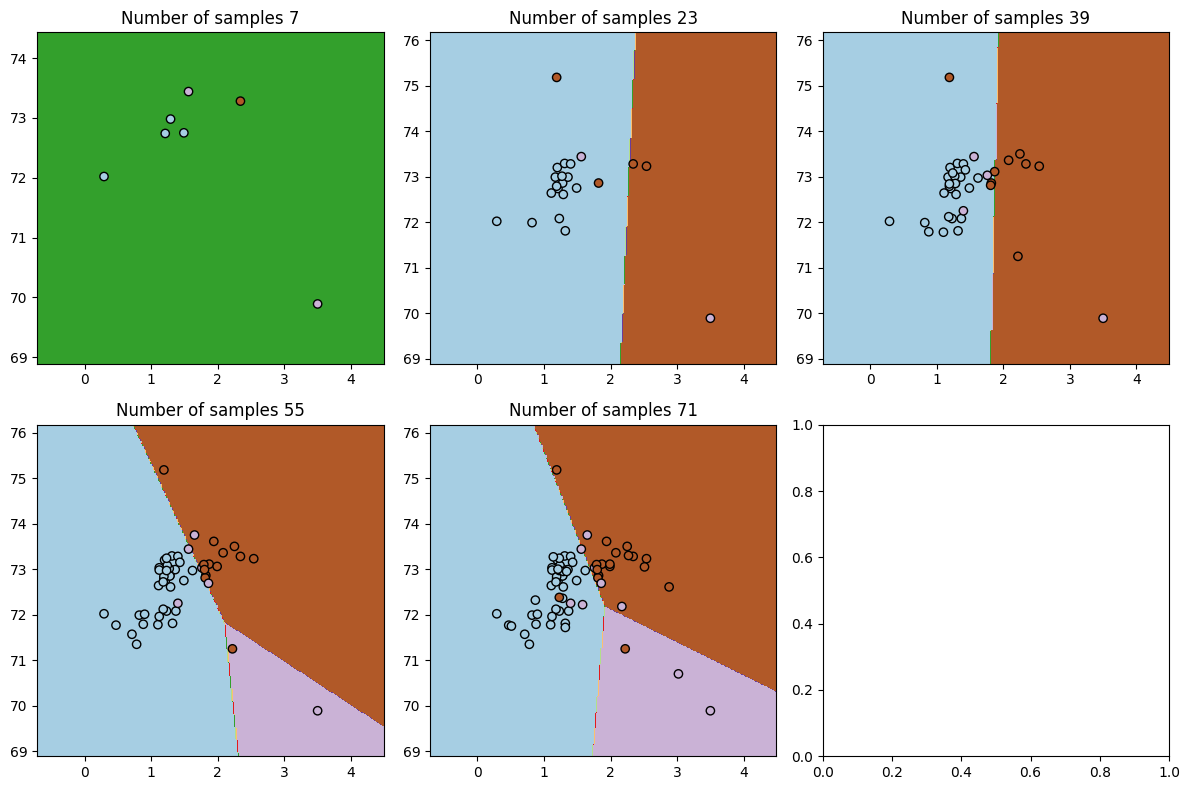

In [ ]:
# block with insufficient iteration limit and need to scale the data
# the fix is applied in the next block for comparizon. Significant improvement is demonstrated there.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

X, y, class_names = load_dataset()
X, y, class_names = remove_classes(X, y, class_names, classes_to_remove=[class_names[4],class_names[2],class_names[1]])
X = X.iloc[:, 4:6]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)
X_t, X_val, y_t, y_val = train_test_split(X_train, y_train, test_size = 0.20, random_state=0)

# Create an instance of Logistic Regression
logreg = LogisticRegression(max_iter=10000)   #logreg = LogisticRegression()
# List of epochs
epochs = [0.1, 0.325, 0.55, 0.775, 1]
# Initialize figure and subplots for plotting
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
axs = axs.ravel()
# Training and plotting for each epoch
for i, epoch in enumerate(epochs):
#for i in epochs():
    # Set the max number of iterations for training
    logreg.max_iter = int(epoch * X_t.shape[0])
    X_tmp = X_t[:logreg.max_iter].to_numpy()
    print(X_tmp.shape)
    y_tmp = y_t[:logreg.max_iter].to_numpy()
    print(y_tmp.shape)
    # Fit the logistic regression model
    logreg.fit(X_tmp, y_tmp)

    # Make predictions on the training data
    y_pred = logreg.predict(X_tmp)

    # Plot the decision boundary
    h = 0.02  # step size in the mesh
    x_min, x_max = X_tmp[:, 0].min() - 1, X_tmp[:, 0].max() + 1
    y_min, y_max = X_tmp[:, 1].min() - 1, X_tmp[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axs[i].contourf(xx, yy, Z, cmap=plt.cm.Paired)
    axs[i].scatter(X_tmp[:, 0], X_tmp[:, 1], c=y_tmp, edgecolors='k', cmap=plt.cm.Paired)
    axs[i].set_title(f'Number of samples {X_tmp.shape[0]}')
    #axs[i].set_xlabel(iris.feature_names[0])
    #axs[i].set_ylabel(iris.feature_names[1])

# Show the plot
plt.tight_layout()
plt.show()

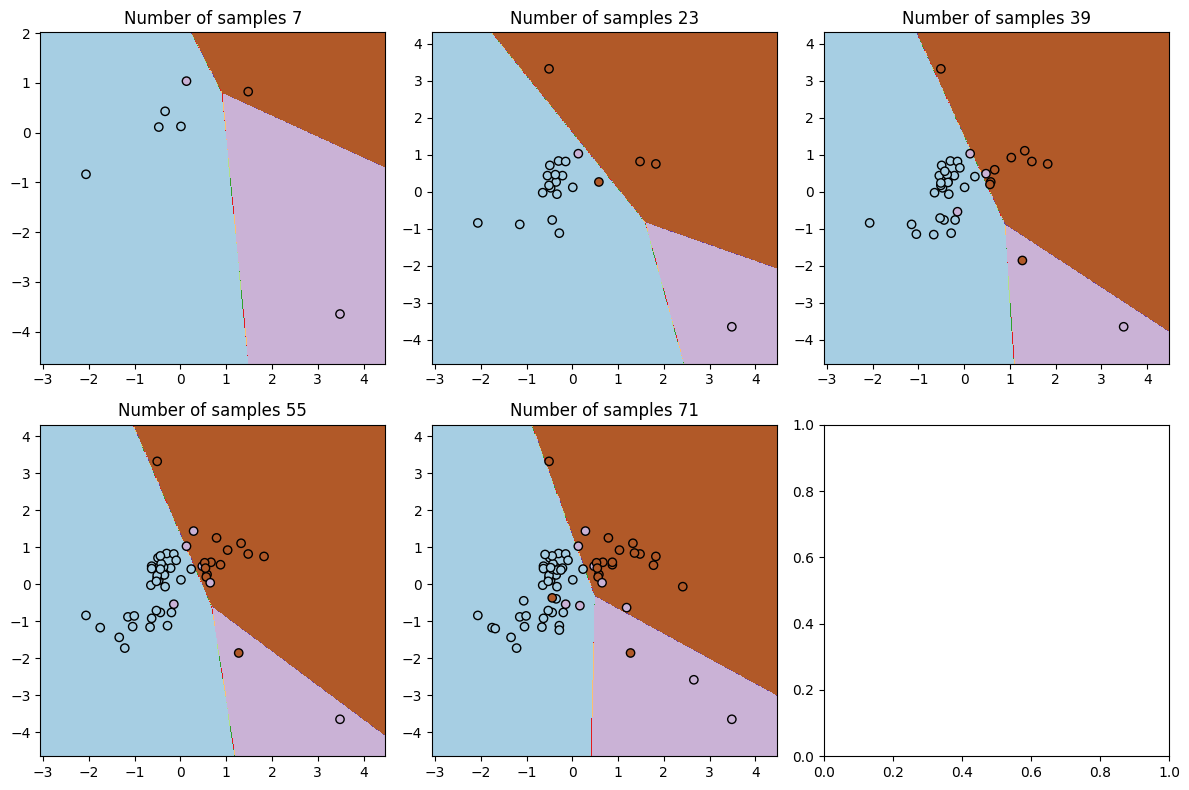

In [ ]:
# fixing the warning in previous block for optimization
# significant improvement is demonstrated as compared to suboptimal conditions.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Load and prepare dataset (including scaling)
X, y, class_names = load_dataset()
X, y, class_names = remove_classes(X, y, class_names, classes_to_remove=[class_names[4], class_names[2], class_names[1]])
X = X.iloc[:, 4:6]

# Scaling the data
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
X_t, X_val, y_t, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=0)
X_t = scaler.fit_transform(X_t)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Create an instance of Logistic Regression with increased iterations
logreg = LogisticRegression(max_iter=1000)

# List of epochs
epochs = [0.1, 0.325, 0.55, 0.775, 1]

# Initialize figure and subplots for plotting
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
axs = axs.ravel()

# Training and plotting for each epoch
for i, epoch in enumerate(epochs):
    # Get subset of the data based on the epoch size
    length = int(X_t.shape[0] * epoch)
    X_tmp = X_t[:length]
    y_tmp = y_t[:length]

    # Fit the logistic regression model
    logreg.fit(X_tmp, y_tmp)

    # Make predictions on the training data
    y_pred = logreg.predict(X_tmp)

    # Plot the decision boundary
    h = 0.02  # step size in the mesh
    x_min, x_max = X_tmp[:, 0].min() - 1, X_tmp[:, 0].max() + 1
    y_min, y_max = X_tmp[:, 1].min() - 1, X_tmp[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axs[i].contourf(xx, yy, Z, cmap=plt.cm.Paired)
    axs[i].scatter(X_tmp[:, 0], X_tmp[:, 1], c=y_tmp, edgecolors='k', cmap=plt.cm.Paired)
    axs[i].set_title(f'Number of samples {X_tmp.shape[0]}')

# Show the plot
plt.tight_layout()
plt.show()
